This notebook aims to introduce how to run ITEMO

In [1]:
from invTrEMO import invTrEMO

First, let us define the target problem. In this notebook, we employ mDTLZ2-(1,0) as the example

In [2]:
import dtlz
test_problem = dtlz.DTLZ2(obj_num=3,n_var=8)

Then, generate the source dataset. The user could generate any source dataset by using "creat_source_data.py". Here, we directly use a predefined dataset.

In [3]:
import pickle

source_data = pickle.load(open("source_data_dtlz2_hs.p", "rb"))

After the preparion, we can run ITEMO

In [4]:
import numpy as np

Pop = np.random.rand(20,test_problem.dim)
inv_tgps, recorded_IGD, target_data = invTrEMO(test_problem,source_data,init_pop=Pop)

ITEMO IGD: 0.3867363544106277


i:\invTrEMO\invTrEMO\InvGPList.py:254: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.model_list.models[i].mean_module.constant.data = torch.tensor(self.set_mean[i])


ITEMO IGD: 0.35485266380621194
ITEMO IGD: 0.3213704430047811
ITEMO IGD: 0.3083841618925979
ITEMO IGD: 0.28317545185470383
ITEMO IGD: 0.26349135806101975
ITEMO IGD: 0.26345992677449465
ITEMO IGD: 0.2586774549649252
ITEMO IGD: 0.2539440333553063
ITEMO IGD: 0.2530659830041531
ITEMO IGD: 0.25277204615173565
ITEMO IGD: 0.2521323047300933
ITEMO IGD: 0.2519954099956362
ITEMO IGD: 0.2519954099956362
ITEMO IGD: 0.24323576611512343
ITEMO IGD: 0.24130142910556998
ITEMO IGD: 0.24130142910556998
ITEMO IGD: 0.2397625207706225
ITEMO IGD: 0.23966506687915776
ITEMO IGD: 0.21486326329093727
ITEMO IGD: 0.18934975774890656
ITEMO IGD: 0.18896901508549482
ITEMO IGD: 0.18863816411675893
ITEMO IGD: 0.18778387934205443
ITEMO IGD: 0.18778387934205443
ITEMO IGD: 0.16742787717405366
ITEMO IGD: 0.16742787717405366
ITEMO IGD: 0.16493698229573067
ITEMO IGD: 0.1645926524007454
ITEMO IGD: 0.1606423152678307
ITEMO IGD: 0.16002866932187382
ITEMO IGD: 0.15584807538667472
ITEMO IGD: 0.1528256559691864
ITEMO IGD: 0.1503201

Let us test the performance of ITEMO. Firstly, we sample a set of points from the Pareto Front. For mDTLZ2-(1,0), the points are sampled as follows.

In [5]:
from Utils import generate_w

w_sample = generate_w(test_problem.obj_num,2000)
y_true = w_sample / np.sqrt(np.sum(w_sample**2,axis=1)).reshape(-1,1)

Then, the RMSE can be calculated by calculating the error between the predicted mean of the inverse TGPs and the true data.

In [6]:
x_sample, _ = inv_tgps.predict(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE = np.sqrt(np.mean((y_pred - y_true)**2))
print("invTrEMO RMSE Result:"+str(RMSE))

ITEMO RMSE Result:0.014759376033484465


Next, we compare it with ParEGO. After ParEGO find a set of nondominated solutions, inverse GP models are build. The result is recorded as ParEGO. Moreover, we also build inverse TGP models based on source data and the nondominated solutions obtained ParEGO, the result is recorded as ParEGO-HS

In [7]:
from ParEGO_UCB import ParEGO_UCB

inv_tgps_parego, Recorded_ParEGO_IGD, target_data_parego = ParEGO_UCB(test_problem,source_data,init_pop=Pop)
x_sample, _ = inv_tgps_parego.predict_gp(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE_parego = np.sqrt(np.mean((y_pred - y_true)**2))
print("ParEGO-UCB RMSE Result (No Transfer):"+str(RMSE_parego))

x_sample, _ = inv_tgps_parego.predict(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE_parego = np.sqrt(np.mean((y_pred - y_true)**2))
print("ParEGO-UCB RMSE Result (Transfer):"+str(RMSE_parego))

ParEGO IGD: 0.3867363544106277
ParEGO IGD: 0.3346087678593356
ParEGO IGD: 0.3210051185547212
ParEGO IGD: 0.2951333057078207
ParEGO IGD: 0.2561300370791876
ParEGO IGD: 0.25590282861939934
ParEGO IGD: 0.24706950583752196
ParEGO IGD: 0.24567199057716635
ParEGO IGD: 0.24398541083930778
ParEGO IGD: 0.24398541083930778
ParEGO IGD: 0.24398541083930778
ParEGO IGD: 0.24398541083930778
ParEGO IGD: 0.24398541083930778
ParEGO IGD: 0.24398541083930778
ParEGO IGD: 0.22740264498240575
ParEGO IGD: 0.2220311262709599
ParEGO IGD: 0.22138499924940355
ParEGO IGD: 0.21805152635517958
ParEGO IGD: 0.21805152635517958
ParEGO IGD: 0.21803619056285878
ParEGO IGD: 0.217320366406263
ParEGO IGD: 0.21636353762743182
ParEGO IGD: 0.2120054000183848
ParEGO IGD: 0.21176567087530165
ParEGO IGD: 0.21176567087530165
ParEGO IGD: 0.21176567087530165
ParEGO IGD: 0.2011346438718611
ParEGO IGD: 0.2011346438718611
ParEGO IGD: 0.2011346438718611
ParEGO IGD: 0.2011346438718611
ParEGO IGD: 0.19717023602874362
ParEGO IGD: 0.1901770

The convergence trends also show that ITEMO is able to provide better convergence.

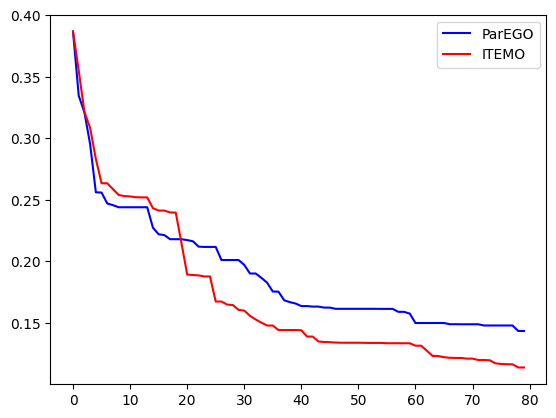

In [8]:
import matplotlib.pyplot as plt

plt.plot(np.array(Recorded_ParEGO_IGD), color = 'blue', label = 'ParEGO')
plt.plot(np.array(recorded_IGD), color = 'red', label = 'ITEMO')
plt.legend()
# plt.semilogy()
plt.show()